In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [2]:
# from google.colab import drive
# import pandas as pd

# # Mount Google Drive
# drive.mount('/content/drive')

# # Path to your file in Google Drive
# file_path = '/content/drive/My Drive/Project 3 - ML/diabetes_012_health_indicators_BRFSS2015.csv'

# # Read the file into a pandas DataFrame
# df = pd.read_csv(file_path)

# df

In [3]:

# Read the file into a pandas DataFrame
df = pd.read_csv('https://www.dropbox.com/scl/fi/th50x7wigb9t2nbz0gkxr/diabetes_012_health_indicators_BRFSS2015.csv?rlkey=35pxpan29zn7vr0ur5m5qzfxe&st=3gc9uezl&dl=1')

df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
columns = df.columns.tolist() # Get the column names as a list
columns = columns[1:] + [columns[0]] # Move the first column to the end
df = df[columns]

In [6]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_012'],
      dtype='object')

In [7]:
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,0.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,2.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,0.0


In [8]:
df1 = df.copy()

In [9]:
df1['HighBP'] = df1['HighBP'].replace({1: 'High', 0: 'Not High'})
df1['HighChol'] = df1['HighChol'].replace({1: 'High', 0: 'Not High'})
df1['CholCheck'] = df1['CholCheck'].replace({1: 'Yes', 0: 'No'})
df1['Smoker'] = df1['Smoker'].replace({1: 'Yes', 0: 'No'})
df1['Stroke'] = df1['Stroke'].replace({1: 'Yes', 0: 'No'})
df1['HeartDiseaseorAttack'] = df1['HeartDiseaseorAttack'].replace({1: 'Yes', 0: 'No'})
df1['PhysActivity'] = df1['PhysActivity'].replace({1: 'Yes', 0: 'No'})
df1['Fruits'] = df1['Fruits'].replace({1: 'Yes', 0: 'No'})
df1['Veggies'] = df1['Veggies'].replace({1: 'Yes', 0: 'No'})
df1['GenHlth'] = df1['GenHlth'].replace({1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor',})
df1['HvyAlcoholConsump'] = df1['HvyAlcoholConsump'].replace({1: 'Yes', 0: 'No'})
df1['AnyHealthcare'] = df1['AnyHealthcare'].replace({1: 'Yes', 0: 'No'})
df1['NoDocbcCost'] = df1['NoDocbcCost'].replace({1: 'Yes', 0: 'No'})
df1['DiffWalk'] = df1['DiffWalk'].replace({1: 'Yes', 0: 'No'})
df1['Sex'] = df1['Sex'].replace({1: 'Male', 0: 'Female'})
df1['Age'] = df1['Age'].replace({1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
                               6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
                              11: '70-74', 12: '75-79', 13: '80 or older'})
df1['Education'] = df1['Education'].replace({1: 'Never attended or Kindergarten', 2: 'Elementary',
                                           3: 'Some High School',
                                          4: 'High School Grad', 5: 'Some College/Tech School',
                                          6: 'College Grad'})
df1['Income'] = df1['Income'].replace({1: 'less than $10,000', 2: 'less than $15,000', 3: 'less than $20,000',
                                     4: 'less than $25,000', 5: 'less than $35,000', 6: 'less than $50,000',
                                     7: 'less than $75,000', 8: '$75,000 or more'})

In [10]:
df1

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,High,High,Yes,40.0,Yes,No,No,No,No,Yes,...,No,Poor,18.0,15.0,Yes,Female,60-64,High School Grad,"less than $20,000",0.0
1,Not High,Not High,No,25.0,Yes,No,No,Yes,No,No,...,Yes,Good,0.0,0.0,No,Female,50-54,College Grad,"less than $10,000",0.0
2,High,High,Yes,28.0,No,No,No,No,Yes,No,...,Yes,Poor,30.0,30.0,Yes,Female,60-64,High School Grad,"$75,000 or more",0.0
3,High,Not High,Yes,27.0,No,No,No,Yes,Yes,Yes,...,No,Very Good,0.0,0.0,No,Female,70-74,Some High School,"less than $50,000",0.0
4,High,High,Yes,24.0,No,No,No,Yes,Yes,Yes,...,No,Very Good,3.0,0.0,No,Female,70-74,Some College/Tech School,"less than $25,000",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,High,High,Yes,45.0,No,No,No,No,Yes,Yes,...,No,Good,0.0,5.0,No,Male,40-44,College Grad,"less than $75,000",0.0
253676,High,High,Yes,18.0,No,No,No,No,No,No,...,No,Fair,0.0,0.0,Yes,Female,70-74,Elementary,"less than $25,000",2.0
253677,Not High,Not High,Yes,28.0,No,No,No,Yes,Yes,No,...,No,Excellent,0.0,0.0,No,Female,25-29,Some College/Tech School,"less than $15,000",0.0
253678,High,Not High,Yes,23.0,No,No,No,No,Yes,Yes,...,No,Good,0.0,0.0,No,Male,50-54,Some College/Tech School,"less than $10,000",0.0


<Axes: >

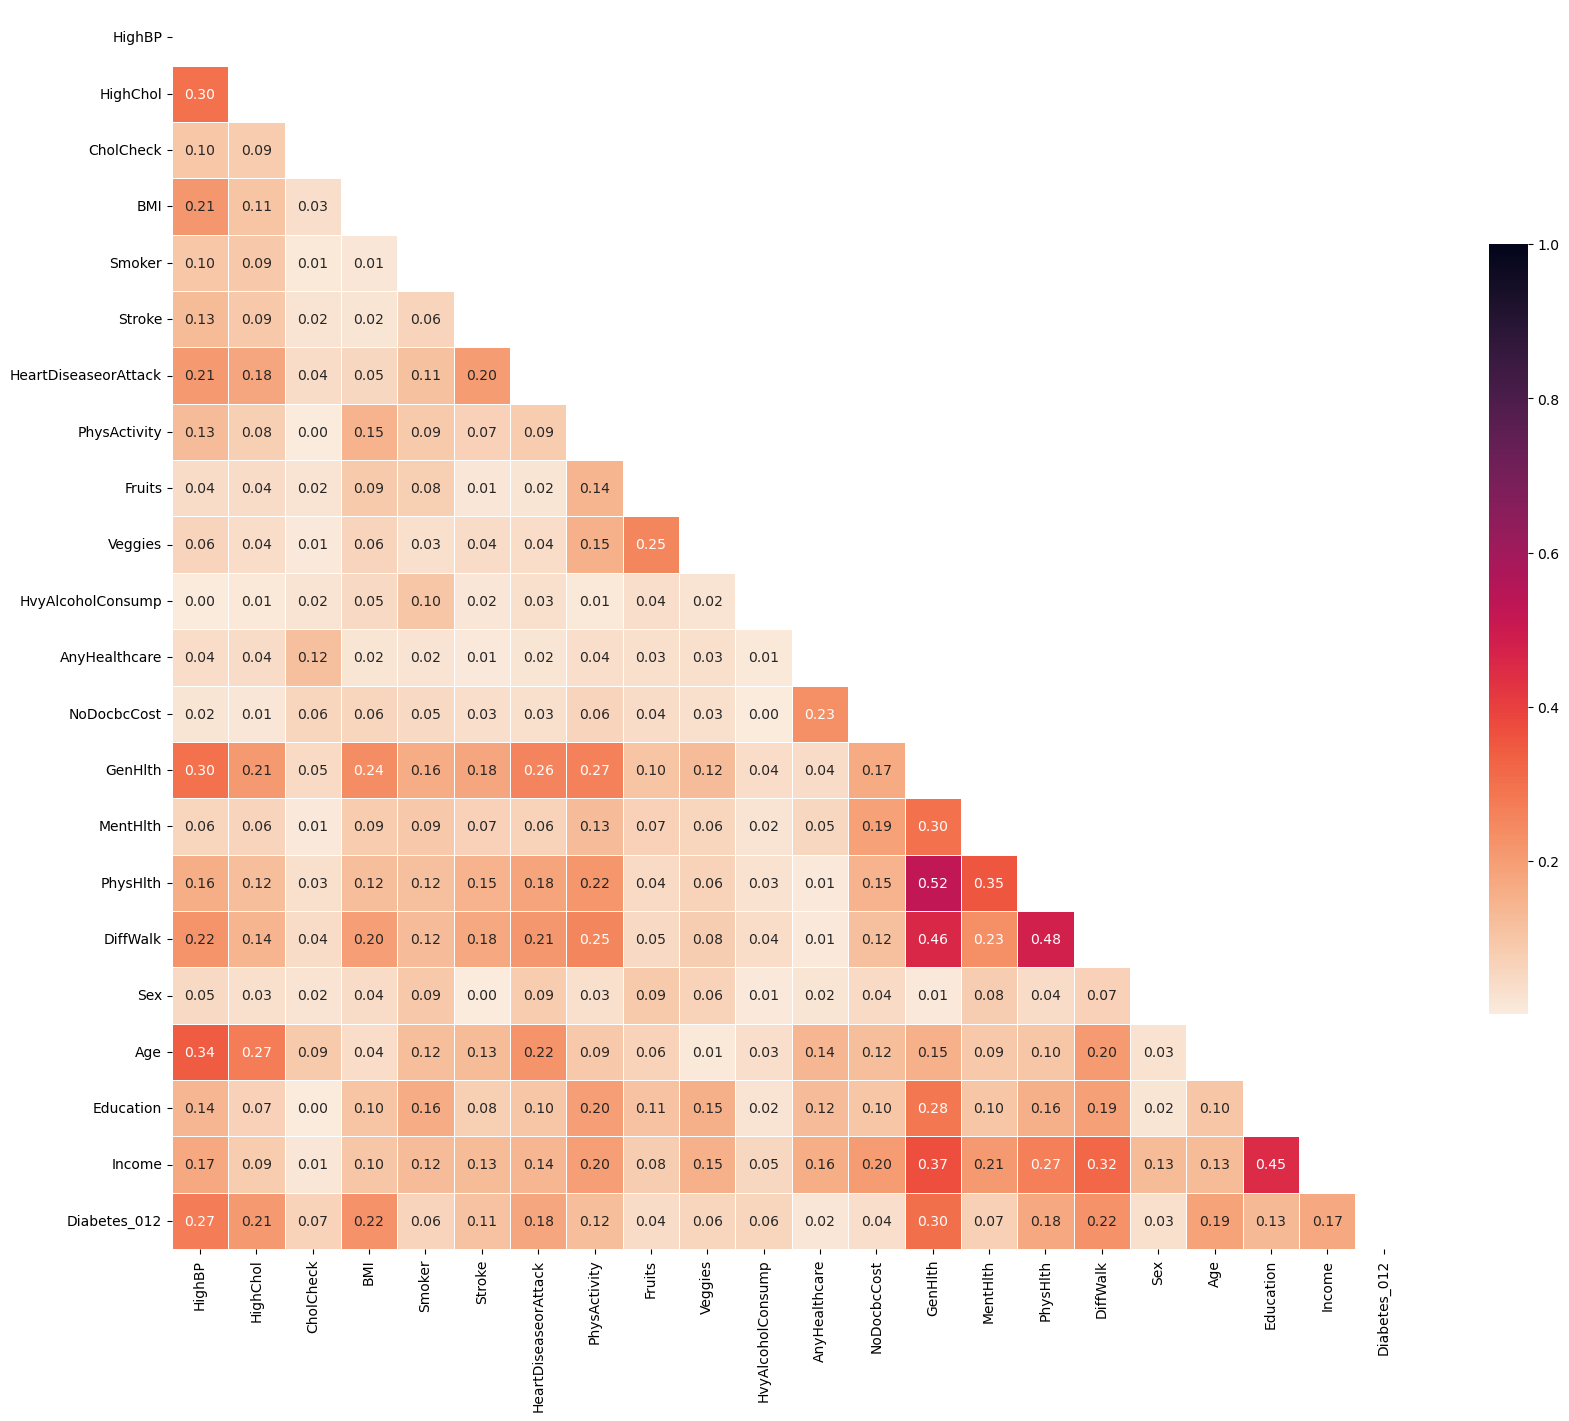

In [11]:
corr = np.abs(df.corr())
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
# Using a simpler color palette
cmap = sns.cm.rocket_r
# You can choose any other simple palette here
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=corr, fmt=".2f")

In [12]:
features = df.drop(columns = ["Diabetes_012"])
target = df["Diabetes_012"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
knn.score(X_test, y_test)

0.8310272784610533

In [17]:
#One Hot Encoding

X_train_num= X_train.select_dtypes(include=np.number)
X_test_num= X_test.select_dtypes(include=np.number)

In [18]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_norm = transformer.transform(X_train_num)
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns=X_train_num.columns).reset_index(drop=True)
X_train_num_scale.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,0.162791,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.033333,0.000000,0.0,1.0,0.500000,0.8,0.857143
1,0.0,0.0,1.0,0.220930,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.50,0.333333,0.000000,0.0,0.0,0.166667,0.8,0.714286
2,0.0,0.0,1.0,0.139535,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.00,0.000000,0.000000,0.0,1.0,0.416667,1.0,1.000000
3,1.0,0.0,1.0,0.139535,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.333333,1.0,0.0,1.000000,0.6,0.857143
4,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,0.0,0.083333,0.8,0.571429


In [19]:
X_test_norm = transformer.transform(X_test_num)
X_test_num_scale = pd.DataFrame(X_test_norm, index = X_test_num.index, columns=X_test_num.columns).reset_index(drop=True)
X_test_num_scale.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,0.383721,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.1,0.0,0.0,0.250000,0.8,0.000000
1,0.0,0.0,1.0,0.139535,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.833333,0.6,1.000000
2,0.0,0.0,1.0,0.104651,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.666667,0.6,0.857143
3,1.0,1.0,1.0,0.220930,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.416667,1.0,0.857143
4,1.0,1.0,1.0,0.255814,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.833333,0.6,0.714286


In [20]:
X_train = X_train_num_scale
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,0.162791,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.033333,0.000000,0.0,1.0,0.500000,0.8,0.857143
1,0.0,0.0,1.0,0.220930,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.50,0.333333,0.000000,0.0,0.0,0.166667,0.8,0.714286
2,0.0,0.0,1.0,0.139535,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.00,0.000000,0.000000,0.0,1.0,0.416667,1.0,1.000000
3,1.0,0.0,1.0,0.139535,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.333333,1.0,0.0,1.000000,0.6,0.857143
4,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,0.0,0.083333,0.8,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,0.0,1.0,1.0,0.127907,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.250000,1.0,1.000000
202940,0.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.000000,0.0,1.0,0.416667,0.8,1.000000
202941,1.0,1.0,1.0,0.348837,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.50,0.333333,0.233333,1.0,0.0,1.000000,0.6,0.714286
202942,1.0,1.0,1.0,0.174419,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.166667,0.0,1.0,0.916667,0.8,0.857143


In [21]:
X_test = X_test_num_scale
X_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,0.383721,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.100000,0.0,0.0,0.250000,0.8,0.000000
1,0.0,0.0,1.0,0.139535,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.00,0.000000,0.000000,0.0,1.0,0.833333,0.6,1.000000
2,0.0,0.0,1.0,0.104651,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,0.0,0.666667,0.6,0.857143
3,1.0,1.0,1.0,0.220930,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,0.0,0.416667,1.0,0.857143
4,1.0,1.0,1.0,0.255814,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.000000,0.0,1.0,0.833333,0.6,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,1.0,0.0,1.0,0.290698,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.133333,0.000000,0.0,1.0,0.500000,0.6,1.000000
50732,1.0,0.0,1.0,0.244186,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.75,0.000000,1.000000,1.0,1.0,0.750000,0.8,0.571429
50733,0.0,0.0,1.0,0.151163,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.333333,0.000000,0.0,0.0,0.666667,1.0,1.000000
50734,1.0,0.0,1.0,0.186047,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.75,1.000000,0.333333,0.0,0.0,0.500000,1.0,0.000000


In [22]:
knn.score(X_test, y_test)

0.839975559760328

In [23]:
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.8441639072847682
TestSet =  0.8411975717439294


<Axes: >

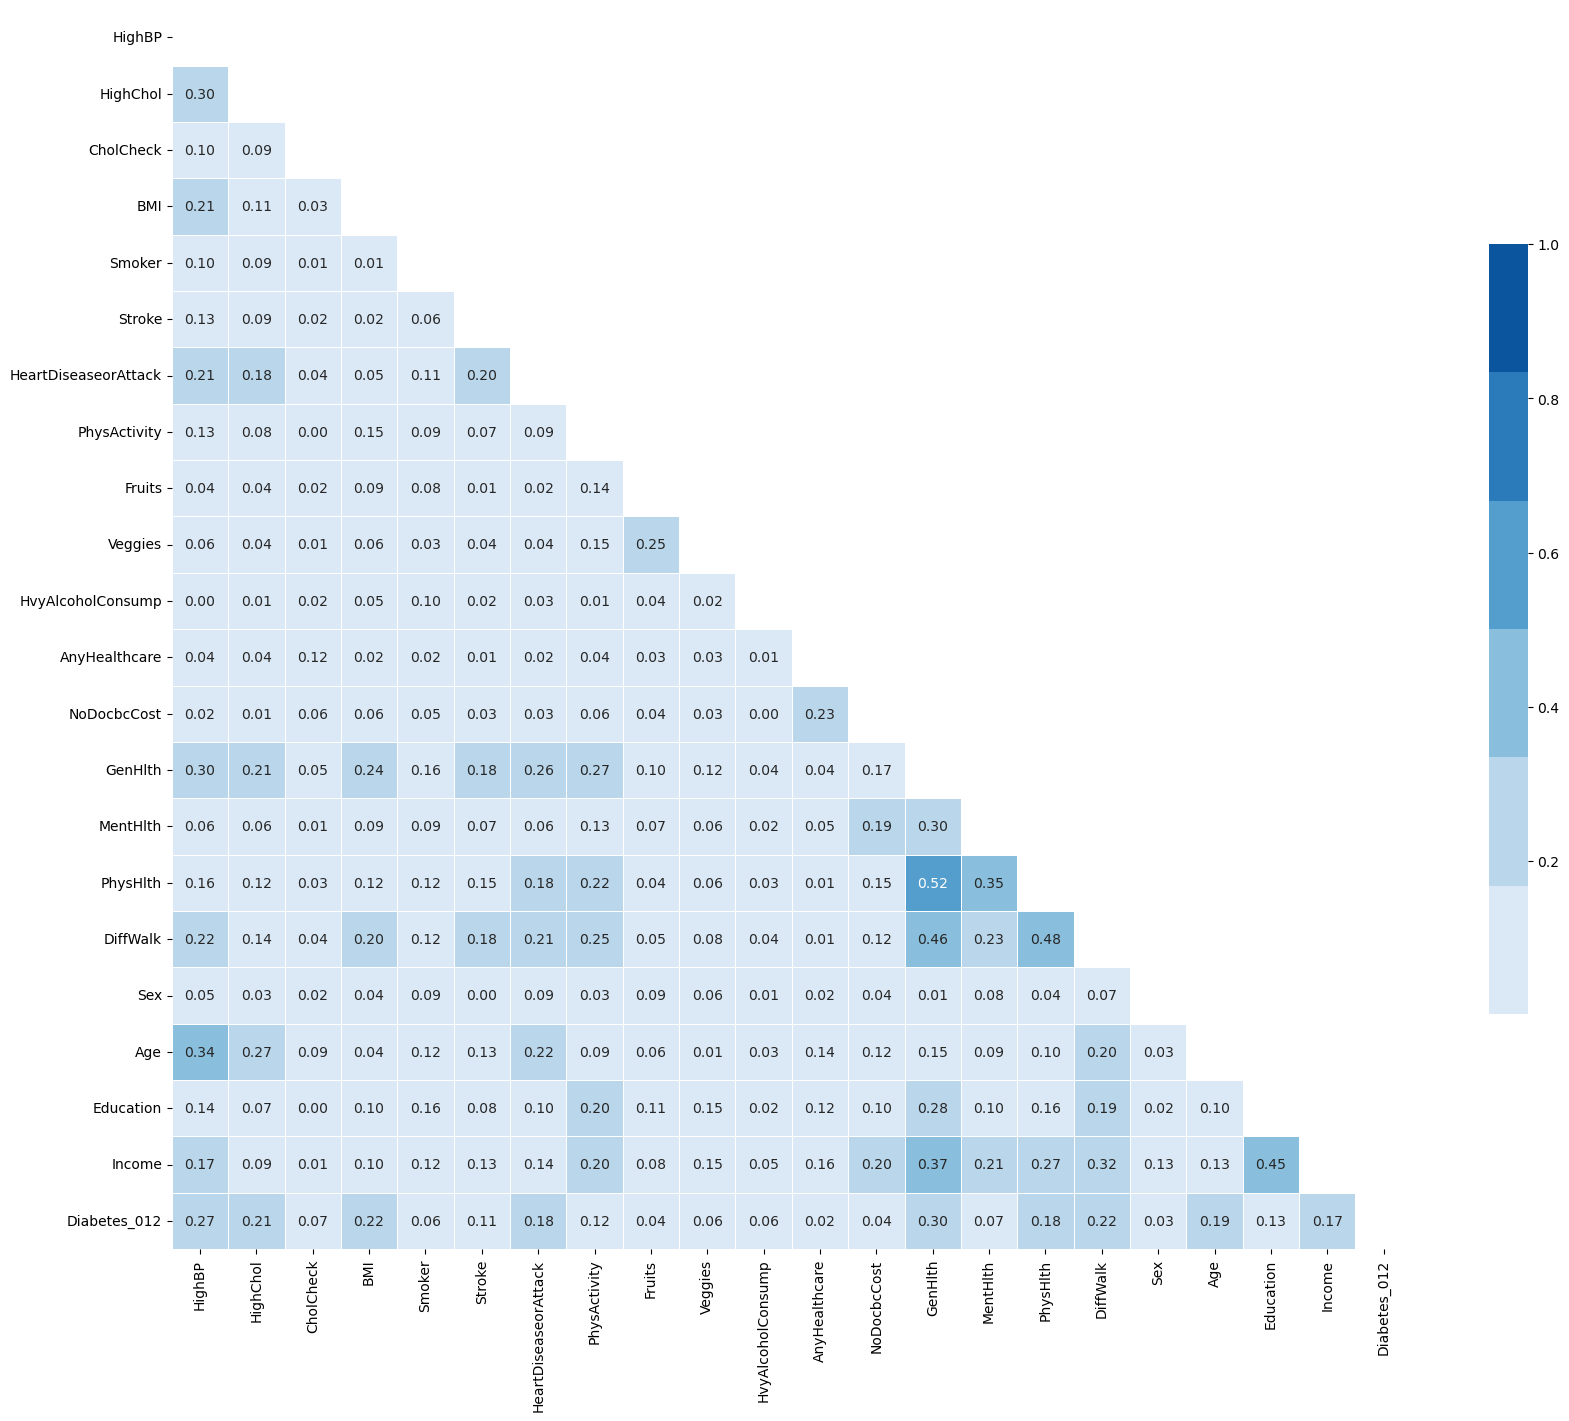

In [24]:
corr = np.abs(df.corr())
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
# Using a simpler color palette
cmap = sns.color_palette('Blues')
# You can choose any other simple palette here
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=corr, fmt=".2f")

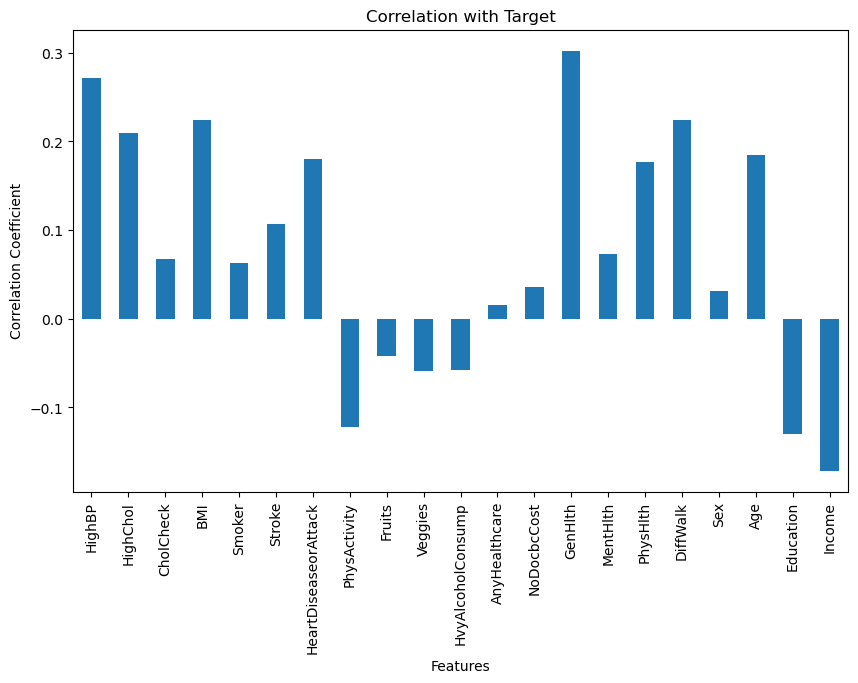

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and the target column is 'target'
target = 'Diabetes_012'
features = df.columns.drop(target)

# Calculate correlations
correlations = df[features].corrwith(df[target])

# Plot bar chart
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

<0.10
cholcheck, smoker, fruits, veggies, hvyalc, anyhealth, nodocbcco, menthlth, sex

In [27]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_012'],
      dtype='object')

In [54]:
X_train_reduced = X_train.drop(columns = ["CholCheck", "Smoker", "Fruits", "Veggies", "HvyAlcoholConsump",
                                         "AnyHealthcare", "NoDocbcCost", "MentHlth", "Sex"])
X_test_reduced = X_test.drop(columns = ["CholCheck", "Smoker", "Fruits", "Veggies", "HvyAlcoholConsump",
                                         "AnyHealthcare", "NoDocbcCost", "MentHlth", "Sex"])

In [56]:
X_train_reduced

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,0.0,0.162791,0.0,0.0,1.0,0.25,0.000000,0.0,0.500000,0.8,0.857143
1,0.0,0.0,0.220930,0.0,0.0,0.0,0.50,0.000000,0.0,0.166667,0.8,0.714286
2,0.0,0.0,0.139535,0.0,0.0,1.0,0.00,0.000000,0.0,0.416667,1.0,1.000000
3,1.0,0.0,0.139535,0.0,0.0,0.0,0.50,0.333333,1.0,1.000000,0.6,0.857143
4,1.0,1.0,0.186047,0.0,0.0,1.0,0.50,0.000000,0.0,0.083333,0.8,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...
202939,0.0,1.0,0.127907,0.0,0.0,1.0,0.25,0.000000,0.0,0.250000,1.0,1.000000
202940,0.0,0.0,0.174419,0.0,0.0,1.0,0.00,0.000000,0.0,0.416667,0.8,1.000000
202941,1.0,1.0,0.348837,0.0,1.0,0.0,0.50,0.233333,1.0,1.000000,0.6,0.714286
202942,1.0,1.0,0.174419,0.0,1.0,1.0,0.50,0.166667,0.0,0.916667,0.8,0.857143


In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train_reduced, y_train)

knn.score(X_test_reduced, y_test)

0.8300417849258909

In [30]:
#RandomForest
clf.fit(X_train_reduced, y_train)
print('TrainSet = ',clf.score(X_train_reduced, y_train))
print('TestSet = ',clf.score(X_test_reduced, y_test))

TrainSet =  0.8458885209713024
TestSet =  0.8435036266162094


In [31]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)
bagging_clf.fit(X_train_reduced, y_train)
y_pred_bag = bagging_clf.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred_bag)
recall = recall_score(y_test, y_pred_bag, average='weighted')
precision = precision_score(y_test, y_pred_bag, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.8472287921791233
Recall: 0.8472287921791233
Precision: 0.8028964490197334


In [32]:
forest = RandomForestClassifier(n_estimators=100,
                             max_depth=20)
forest.fit(X_train_reduced, y_train)
y_pred_forest = forest.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest, average='weighted')
precision = precision_score(y_test, y_pred_forest, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.8417100283822138
Recall: 0.8417100283822138
Precision: 0.7975706596008588


In [33]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)
ada_clf.fit(X_train_reduced, y_train)
y_pred_ada = ada_clf.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada, average='weighted')
precision = precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.8038670766319773
Recall: 0.8038670766319773
Precision: 0.7811925560533344


In [34]:
# gb_clf = GradientBoostingClassifier(max_depth=20,
#                                    n_estimators=100)
# gb_clf.fit(X_train_reduced, y_train)
# y_pred_gb = gb_clf.predict(X_test_reduced)

# accuracy = accuracy_score(y_test, y_pred_gb)
# recall = recall_score(y_test, y_pred_gb, average='weighted')
# precision = precision_score(y_test, y_pred_gb, average='weighted', zero_division=0)

# print(f'Accuracy: {accuracy}')
# print(f'Recall: {recall}')
# print(f'Precision: {precision}')

In [35]:
tree = DecisionTreeClassifier(max_depth=10)

tree.fit(X_train_reduced, y_train)
y_pred_tree = tree.predict(X_test_reduced)


accuracy = accuracy_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree, average='weighted')
precision = precision_score(y_test, y_pred_tree, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.8456520025228634
Recall: 0.8456520025228634
Precision: 0.8002499417129436


In [36]:
tree_importance = {feature : importance for feature, importance in zip(X_train_reduced.columns, tree.feature_importances_)}
tree_importance

{'HighBP': 0.33286485596109405,
 'HighChol': 0.06289107579245955,
 'BMI': 0.16335189250534096,
 'Stroke': 0.007053963692761749,
 'HeartDiseaseorAttack': 0.015147099678603582,
 'PhysActivity': 0.0035746299054575026,
 'GenHlth': 0.26982843500029585,
 'PhysHlth': 0.017482880347963758,
 'DiffWalk': 0.008992884852895186,
 'Age': 0.0806670171338005,
 'Education': 0.015289203187882766,
 'Income': 0.022856061941444638}

In [37]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_reduced.columns))
print(tree_viz)

|--- HighBP <= 0.50
|   |--- GenHlth <= 0.38
|   |   |--- Age <= 0.71
|   |   |   |--- BMI <= 0.23
|   |   |   |   |--- HighChol <= 0.50
|   |   |   |   |   |--- GenHlth <= 0.12
|   |   |   |   |   |   |--- BMI <= 0.19
|   |   |   |   |   |   |   |--- Income <= 0.50
|   |   |   |   |   |   |   |   |--- Age <= 0.21
|   |   |   |   |   |   |   |   |   |--- BMI <= 0.13
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- BMI >  0.13
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Age >  0.21
|   |   |   |   |   |   |   |   |   |--- PhysHlth <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- PhysHlth >  0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Income >  0.50
|   |   |   |   |   |   |   |   |--- BMI <= 0.18
|   |   |   |   |   |   |   |   |   |--- Stroke <= 0.50
|   |   |   |   |   |   |   |   |   

In [38]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Assuming X_train and y_train are defined
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train_reduced, y_train)

# Export the tree to a dot file
dot_data = export_graphviz(tree, out_file=None,
                           filled=True, rounded=True,
                           feature_names=X_train_reduced.columns,
                           class_names=[str(i) for i in tree.classes_])

# Visualize the tree using graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This will save the graph as a PDF file

'decision_tree.pdf'

In [39]:
from sklearn.metrics import confusion_matrix
bc_confusion_matrix = confusion_matrix(y_test,y_pred_bag)  #Always Actual,Predicted
bc_confusion_matrix 

array([[41674,     0,   943],
       [  820,     0,    88],
       [ 5900,     0,  1311]])

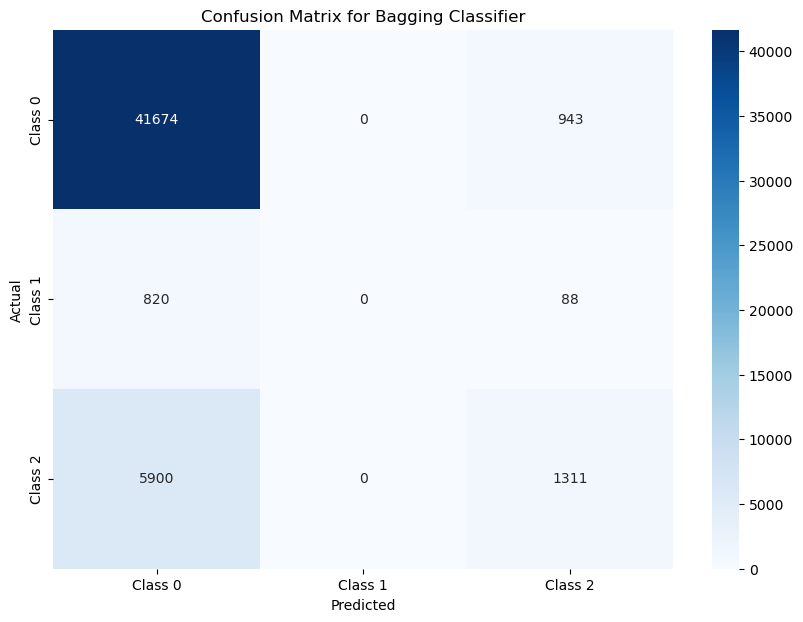

In [59]:
plt.figure(figsize=(10, 7))
sns.heatmap(bc_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

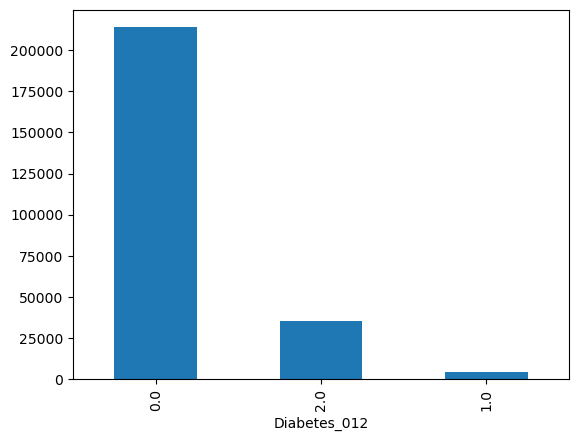

In [40]:
diabetes_target = df['Diabetes_012'].value_counts()
diabetes_target.plot(kind="bar")
plt.show()

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE(random_state=1)
X_train_sm, y_train_sm = sm.fit_resample(X_train_reduced, y_train)

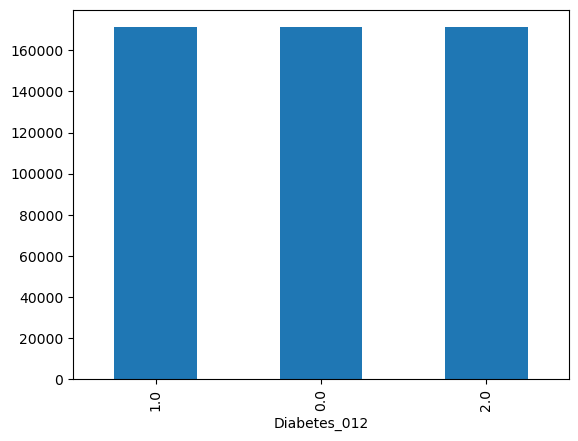

In [58]:
diabetes_train = y_train_sm.value_counts()
diabetes_train.plot(kind="bar")
plt.show()

In [43]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                                n_estimators=100,
                                max_samples=1000,
                                random_state=42)
bagging_clf.fit(X_train_sm, y_train_sm)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100, random_state=42)

In [44]:
y_pred_bag = bagging_clf.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred_bag)
recall = recall_score(y_test, y_pred_bag, average='weighted')
precision = precision_score(y_test, y_pred_bag, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.7375630715862503
Recall: 0.7375630715862503
Precision: 0.8292367473469165


In [45]:
bagging_cm = confusion_matrix(y_test, y_pred_bag)
print(bagging_cm)

[[32635  1507  8475]
 [  402    53   453]
 [ 2130   348  4733]]


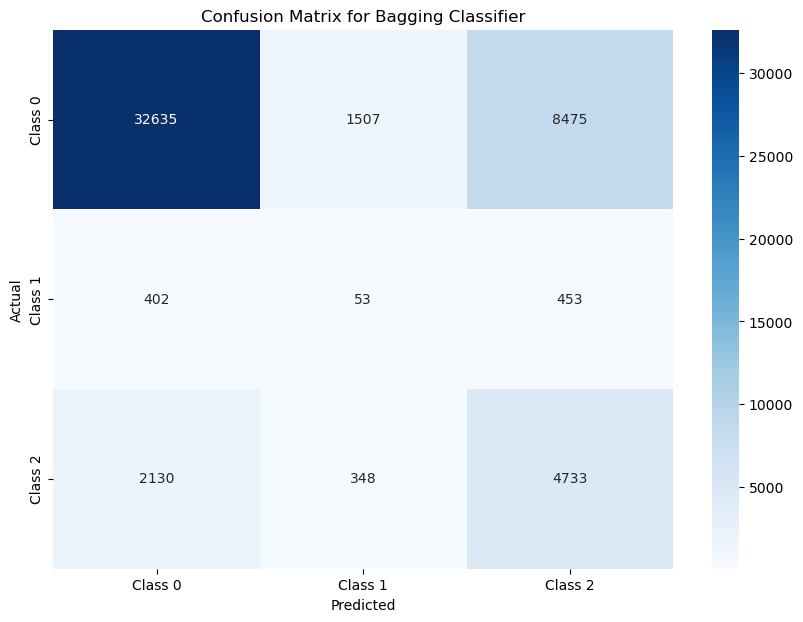

In [46]:
plt.figure(figsize=(10, 7))
sns.heatmap(bagging_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()